# Convolución 1D

Como ejemplo de covolución 1D vamos a generar un array de valores al que aplicaremos una máscara de convolución para suavizar las transiciones de un valor a otro. Sería similar a un filtro de difuminado si habláramos de imágenes.

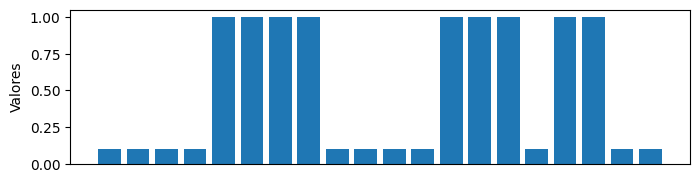

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generar 15 valores aleatorios entre 0 y 1
valores = np.array([0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 0.1 ,0.1 ,0.1 ,0.1, 1, 1, 1, 0.1, 1, 1, 0.1, 0.1])

# Crear el gráfico de barras
plt.bar(range(len(valores)), valores)
plt.gcf().set_size_inches(8, 2)

# Configurar el gráfico
plt.xticks([])  # Quitar etiquetas del eje x
plt.ylabel("Valores")

# Mostrar el gráfico
plt.show()


A continuación creamos una máscara de convolución de 4 valores iguales a 0.25. y aplicamos la convolución a los valores. El resultado es un array de valores suavizados y de menor tamaño al original.
Habría que aplicar **padding** (rellenar con 0 a los lados) para mantener el tamaño original.

[0.05  0.075 0.1   0.325 0.55  0.775 1.    0.775 0.55  0.325 0.1   0.325
 0.55  0.775 0.775 0.775 0.775 0.55  0.55  0.3  ]


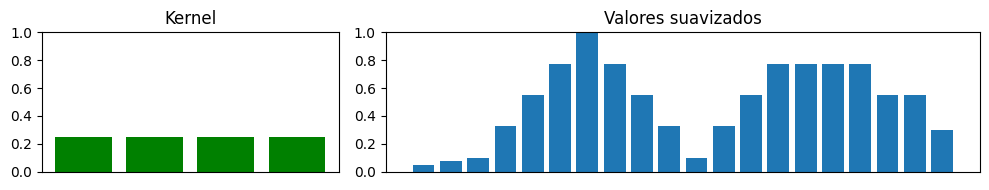

In [13]:
kernel = np.full(4, 0.25)

# mode='same' para aplicar padding, 'valid' sin padding
valores_suavizados = np.convolve(valores, kernel, mode='same')

print(valores_suavizados)

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]}, figsize=(10, 2))

axs[0].bar(range(len(kernel)), kernel, color="green")
axs[0].set_xticks([])
axs[0].set_title("Kernel")
axs[0].set_ylim(0, 1)

# plot en lugar de bar para gràfica de línea
axs[1].bar(range(len(valores_suavizados)), valores_suavizados)
axs[1].set_xticks([])
axs[1].set_title("Valores suavizados")
axs[1].set_ylim(0, 1)

plt.tight_layout();

# Mostrar el gráfico
plt.show()

Si le damos más peso a los valores centrales de la máscara frente a los lejanos, suavizará menos el resultado dejando unas transiciones más pronunciadas (resultado más parecido a los valores originales).

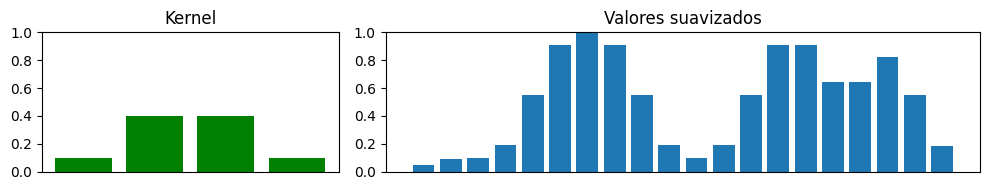

In [20]:
kernel2 = np.array([0.1, 0.4, 0.4, 0.1])

valores_suavizados2 = np.convolve(valores, kernel2, mode='same')

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]}, figsize=(10, 2))

axs[0].bar(range(len(kernel2)), kernel2, color="green")
axs[0].set_xticks([])
axs[0].set_title("Kernel")
axs[0].set_ylim(0, 1)

axs[1].bar(range(len(valores_suavizados2)), valores_suavizados2)
axs[1].set_xticks([])
axs[1].set_title("Valores suavizados")
axs[1].set_ylim(0, 1)

plt.tight_layout();

# Mostrar el gráfico
plt.show()

## Aplicación real (filtro pasa-alta)

En este ejemplo, vamos a aplicar un filtro pasa-alta a una señal de audio utilizando convolución. Este tipo de filtros solo dejan pasar frecuencias altas eliminando las que están por debajo de cierto umbral (1000hz en este ejemplo).

Usaremos la librería librosa para poder cargar audios en otros formatos diferentes a wav (como mp3).

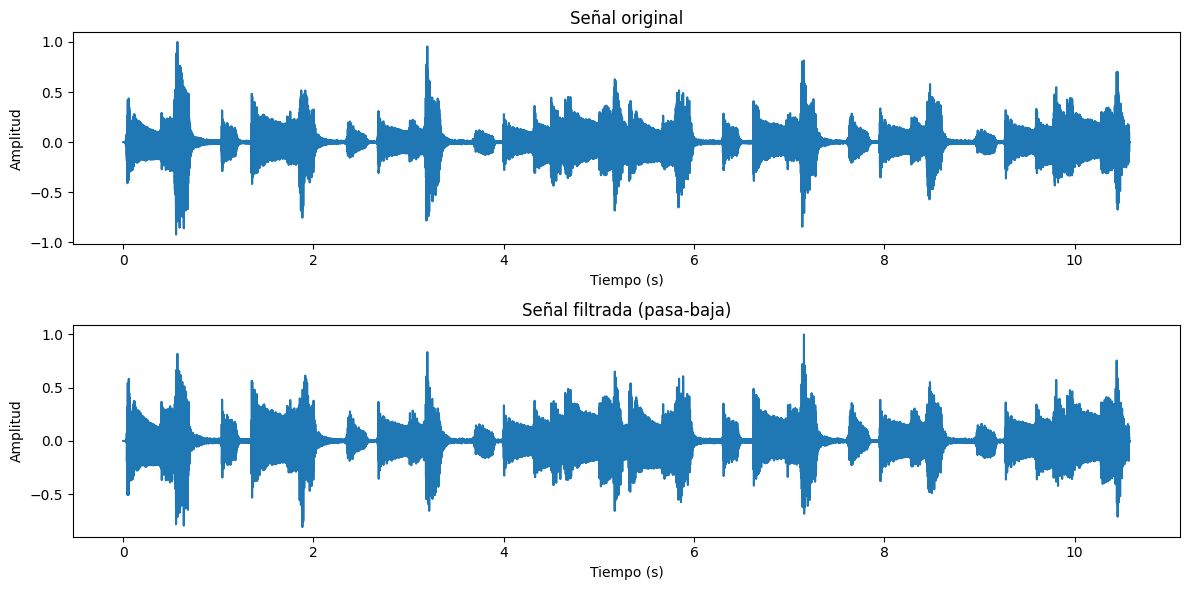

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin, convolve
from IPython.display import Audio
import librosa

# Leer el archivo MP3
ruta_archivo = "guitar.mp3"
x, fs = librosa.load(ruta_archivo, sr=None)

# Normalizar la señal de audio
x = x / np.max(np.abs(x))

cutoff = 1000  # Frecuencia de corte (Hz)
numtaps = 101  # Número de coeficientes del filtro (debe ser impar)
# 'lowpass' deja pasar solo frecuencias más bajas que el umbral. 'highpass' para el efecto contrario
h = firwin(numtaps, cutoff, pass_zero='lowpass', fs=fs)

# Aplicar convolución para filtrar frecuencias
y = convolve(x, h, mode='same')

# Normalizar la señal resultante
y = y / np.max(np.abs(y))

# Graficar las señales
plt.figure(figsize=(12, 6))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(x)) / fs, x)
plt.title("Señal original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

# Señal filtrada (pasa-alta)
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(y)) / fs, y)
plt.title("Señal filtrada (pasa-baja)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

# Guardar la señal con reverberación en un archivo WAV
wavfile.write("audio_pasa_baja.wav", fs, y)